# import libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# load dataset

In [10]:
# training data
X_train = np.loadtxt('train_X.csv', delimiter=',').T
Y_train = np.loadtxt('train_label.csv', delimiter=',').T

# test data
X_test = np.loadtxt('test_X.csv', delimiter=',').T
Y_test = np.loadtxt('test_label.csv', delimiter=',').T

In [11]:
print("Training data shape:", X_train.shape, Y_train.shape)
print("Test data shape:", X_test.shape, Y_test.shape)   

Training data shape: (784, 1000) (10, 1000)
Test data shape: (784, 350) (10, 350)


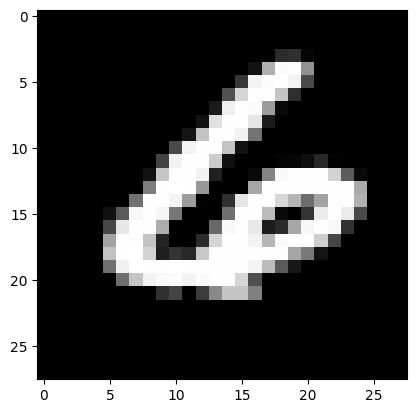

In [14]:
index = random.randrange(0, X_train.shape[1])

plt.imshow(X_train[:, index].reshape(28, 28), cmap='gray')

plt.show()

# define actiavtion functions

In [15]:
def tanh(x):
    return np.tanh(x)


def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

# derivatives of activation functions

In [16]:
def derivative_tanh(x):
    return 1 - np.power(x, 2)

def derivative_relu(x):
    return np.array(x > 0, dtype=np.float32)

def derivative_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)  

def derivative_softmax(x):
    s = softmax(x)
    return s * (1 - s)

# initialize parameters

In [17]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1": w1,
        "b1": b1,   
        "w2": w2,
        "b2": b2
    }

    return parameters

# forward propagation

In [ ]:
def forward_propagation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return cache

# cost function

In [ ]:
def cost_function(y_true, y_pred):
    m = y_true.shape[1]
    cost = -(1/m)*np.sum(y_true*np.log(y_pred + 1e-8))
    return cost

# backward propagation

In [ ]:
def backward_propagation(x, y, parameters, chache):

    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    a1 = chache['a1']
    a2 = chache['a2']


    m = x.shape[1]

    dz2 = a2 - y
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis=1, keepdims=True)
    